## Background information
Horizontal drilling which provides additional exposure of the reservoir to the wellbore (lateral length) is one of the primary drivers that made economic production of oil and gas from the tight shale reservoirs in the US a success, in conjunction with stimulation using hydraulic fracturing.

## Objective
Objective of this study is to understand effect of lateral length of a horizontal well on shale gas production in some of the US shale plays using multiple linear regression analysis. While lateral length would be one of the primary predictors, other variables considered are vertical section length of the horizontal well, proppant volume and fluid volume pumped for stimulating the horizontal section of the well using hydraulic fracturing.

## Data Source
National Oil and Gas Gateway (http://www.noggateway.org/explore)
From participating states that contribute to this data source, Arkansas and Colorado were identified as states of interest for the project owing to the level of shale gas drilling and production activity in these states over the period 2008-2018 and data availability on Fluids and Proppants.

In [70]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as st

In [2]:
from platform import python_version

print('The Python version is {}.' .format(python_version()))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The Python version is 3.8.2.
The scikit-learn version is 0.23.2.


We'll work with the production.csv. It has numerical value columns:

### Response (Target) variable: 
#### Max_Gas: Maximum Gas Production (Million Standard Cubic Feet, MSCF)
### Predictor variables:
##### Lat_Len: Lateral length of the horizontal section (feet)
##### Vert_Len: Length of the vertical section (feet)
##### Fluid: Total amount of fracturing fluid (typically water) pumped to create the hydraulic fractures (Barrels)
##### Proppant: Total amount of proppant (typically sand) pumped along with the fracturing fluid as a slurry to keep the hydraulically created fractures open (Pounds)

Since shale gas wells have their peak production in the first 2-3 years after the well is drilled, stimulated and put on production, maximum annual gas production is selected as the best response variable to predict using the selected predictor variables.


In [71]:
df = pd.read_csv('production.csv', index_col=0)
df.head()

,Well.API,Field,Operator,Spud.Year,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,ShalePlay
Index,,,,,,,,,,
1,5.045130e+12,Grand Valley,Caerus Piceance Llc,2008,99971,1507,6950,15904,492500,Mancos
2,5.045130e+12,Grand Valley,Berry Petroleum Company Llc,2008,124446,1707,8265,48520,458360,Mancos
3,5.045140e+12,Mamm Creek,Ursa Operating Company Llc,2012,132394,1644,6039,89263,1915300,Mancos
4,5.045150e+12,Mamm Creek,Ursa Operating Company Llc,2012,121659,1646,6067,88929,1849000,Mancos
5,5.045150e+12,Mamm Creek,Ursa Operating Company Llc,2012,120910,1645,6048,91243,2829500,Mancos


In [72]:
df.drop(['Well.API', 'Field', 'Operator', 'Spud.Year','ShalePlay'], axis=1, inplace=True)
df.head()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant
Index,,,,,
1,99971,1507,6950,15904,492500
2,124446,1707,8265,48520,458360
3,132394,1644,6039,89263,1915300
4,121659,1646,6067,88929,1849000
5,120910,1645,6048,91243,2829500


In [73]:
df.describe()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant
count,5.168000e+03,5168.000000,5168.000000,5.168000e+03,5.168000e+03
mean,4.227032e+05,4147.998065,4567.358359,1.555068e+05,3.537080e+06
std,2.160341e+05,1414.552412,1432.177570,3.707851e+05,1.874401e+06
min,4.520000e+02,1017.000000,435.000000,6.600000e+01,2.000000e+03
25%,2.640740e+05,3432.000000,3649.500000,7.807425e+04,2.655423e+06
50%,3.959560e+05,4137.000000,4394.500000,1.075520e+05,3.545450e+06
75%,5.493190e+05,4899.000000,5488.000000,1.380805e+05,4.338383e+06
max,2.887155e+06,10403.000000,12380.000000,1.300911e+07,3.676002e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 1 to 5168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Max_Gas   5168 non-null   int64
 1   Lat_Len   5168 non-null   int64
 2   Vert_Len  5168 non-null   int64
 3   Fluid     5168 non-null   int64
 4   Proppant  5168 non-null   int64
dtypes: int64(5)
memory usage: 242.2 KB


## Clean Data and Data Visualization

In [74]:
print(df.isnull().sum())  ### Inspect null value
print(df.columns)

Max_Gas     0
Lat_Len     0
Vert_Len    0
Fluid       0
Proppant    0
dtype: int64
Index(['Max_Gas', 'Lat_Len', 'Vert_Len', 'Fluid', 'Proppant'], dtype='object')


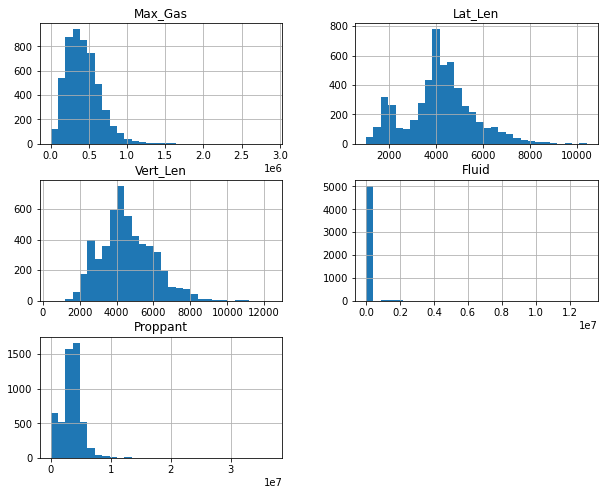

In [75]:
df.hist(bins=30, figsize=(10, 8))
plt.grid(which='both')
plt.show()

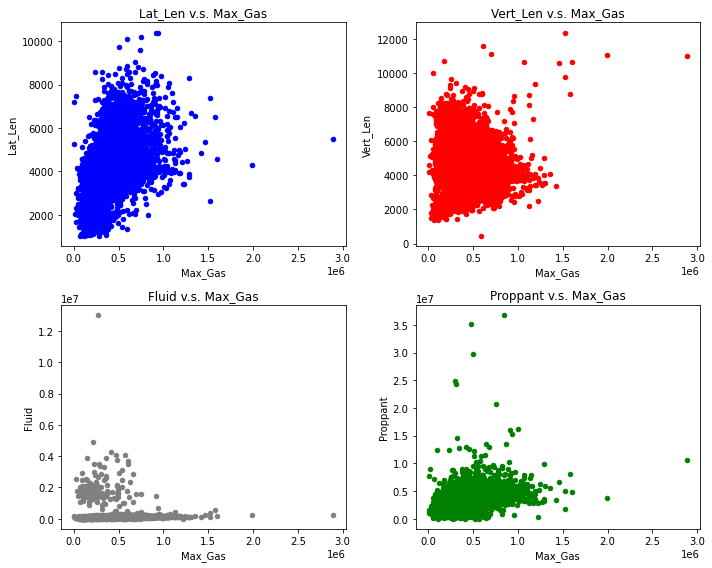

In [10]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, forth plot)

# Subplot 1: Lat_Len v.s. Max_Gas
df.plot(kind='scatter', x='Max_Gas', y='Lat_Len', figsize=(10, 8), color='blue', ax=ax0) # add to subplot 1
ax0.set_title('Lat_Len v.s. Max_Gas')
ax0.set_xlabel('Max_Gas')
ax0.set_ylabel('Lat_Len')

# Subplot 2: Vert_Len v.s. Max_Gas
df.plot(kind='scatter', x='Max_Gas', y='Vert_Len', figsize=(10, 8), color='red', ax=ax1) # add to subplot 2
ax1.set_title ('Vert_Len v.s. Max_Gas')
ax1.set_xlabel('Max_Gas')
ax1.set_ylabel('Vert_Len')

# Subplot 3: Fluid v.s. Max_Gas
df.plot(kind='scatter', x='Max_Gas', y='Fluid', figsize=(10, 8), color='grey', ax=ax2) # add to subplot 3
ax2.set_title ('Fluid v.s. Max_Gas')
ax2.set_xlabel('Max_Gas')
ax2.set_ylabel('Fluid')

# Subplot 4: Proppant v.s. Max_Gas
df.plot(kind='scatter', x='Max_Gas', y='Proppant', figsize=(10, 8), color='green', ax=ax3) # add to subplot 4
ax3.set_title ('Proppant v.s. Max_Gas')
ax3.set_xlabel('Max_Gas')
ax3.set_ylabel('Proppant')

fig.tight_layout()
plt.show()

In [11]:
df.corr()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant
Max_Gas,1.000000,0.515286,-0.055088,-0.017701,0.426597
Lat_Len,0.515286,1.000000,-0.151688,-0.030454,0.762334
Vert_Len,-0.055088,-0.151688,1.000000,-0.120543,-0.124884
Fluid,-0.017701,-0.030454,-0.120543,1.000000,-0.004035
Proppant,0.426597,0.762334,-0.124884,-0.004035,1.000000


Lateral Length (r=0.52) and Proppant (r=0.43) have the highest impact on predicting

### Preprocess
#### Select Columns

In [77]:
x = df.drop('Max_Gas',axis=1) ## Max_Gas is the target values
y = df['Max_Gas']

#### Standardize
Standardize features by removing the mean and scaling to unit variance

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
scaler.fit(x)   
scaled_features = scaler.transform(x)
x_std = pd.DataFrame(scaled_features,columns=x.columns)
x_std.head()

,Lat_Len,Vert_Len,Fluid,Proppant
0,-1.867201,1.663811,-0.376542,-1.624452
1,-1.725800,2.582082,-0.288569,-1.642667
2,-1.770341,1.027655,-0.178676,-0.865309
3,-1.768927,1.047207,-0.179576,-0.900684
4,-1.769634,1.033939,-0.173335,-0.377533


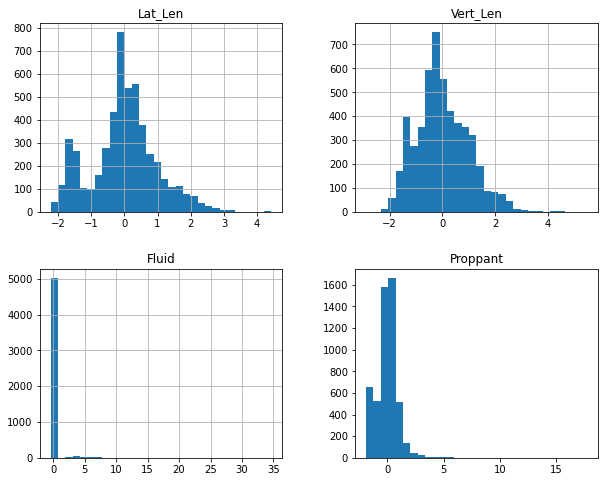

In [15]:
x_std.hist(bins=30, figsize=(10, 8))
plt.grid(which='both')
plt.show()

#### Split training and testing data

In [16]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.20, random_state=42)
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4134 entries, 2886 to 860
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lat_Len   4134 non-null   float64
 1   Vert_Len  4134 non-null   float64
 2   Fluid     4134 non-null   float64
 3   Proppant  4134 non-null   float64
dtypes: float64(4)
memory usage: 161.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034 entries, 1564 to 3670
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lat_Len   1034 non-null   float64
 1   Vert_Len  1034 non-null   float64
 2   Fluid     1034 non-null   float64
 3   Proppant  1034 non-null   float64
dtypes: float64(4)
memory usage: 40.4 KB
None


## Model Training and Testing
#### Linear Regression

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [101938.35153494    419.89491872    131.23819425  13414.52974794]
Intercept:  423453.68109225546
RMSE: 199243.82
R2: 0.24
Correlation: 0.49


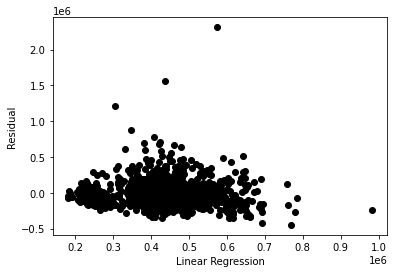

In [81]:
reg = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

# The coefficients
print('Coefficients: \n', df.columns, '\n', reg.coef_)
# The intercept
print('Intercept: ', reg.intercept_)
# The mean squared error
print('RMSE: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f'
      % r2_score(y_test, y_pred))
# The Correlation between predict and test
print('Correlation: %.2f' 
      % np.corrcoef(y_test, y_pred)[0,1])

# Plot outputs
plt.scatter(y_pred, (y_test-y_pred),  color='black')
#plt.plot(x_test['Lat_Len'], y_pred, color='blue', linewidth=3)

plt.xlabel('Linear Regression')
plt.ylabel('Residual')
plt.show()

#### Remarks
The scatter plot of residual and linear regression prediciton show outliers in data and a mega-phone pattern can be observed.
This indicates non-constant variance and questions model validity.
Variable transformation can be applied to address this issue.

## Preprocess
#### Variable Trasformation

In [82]:
df['log_Max_Gas'] = np.log(df['Max_Gas'])
df.describe()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,log_Max_Gas
count,5.168000e+03,5168.000000,5168.000000,5.168000e+03,5.168000e+03,5168.000000
mean,4.227032e+05,4147.998065,4567.358359,1.555068e+05,3.537080e+06,12.810699
std,2.160341e+05,1414.552412,1432.177570,3.707851e+05,1.874401e+06,0.580556
min,4.520000e+02,1017.000000,435.000000,6.600000e+01,2.000000e+03,6.113682
25%,2.640740e+05,3432.000000,3649.500000,7.807425e+04,2.655423e+06,12.483985
50%,3.959560e+05,4137.000000,4394.500000,1.075520e+05,3.545450e+06,12.889058
75%,5.493190e+05,4899.000000,5488.000000,1.380805e+05,4.338383e+06,13.216435
max,2.887155e+06,10403.000000,12380.000000,1.300911e+07,3.676002e+07,14.875782


In [22]:
df.corr()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,log_Max_Gas
Max_Gas,1.000000,0.515286,-0.055088,-0.017701,0.426597,0.910825
Lat_Len,0.515286,1.000000,-0.151688,-0.030454,0.762334,0.538048
Vert_Len,-0.055088,-0.151688,1.000000,-0.120543,-0.124884,-0.083913
Fluid,-0.017701,-0.030454,-0.120543,1.000000,-0.004035,-0.030028
Proppant,0.426597,0.762334,-0.124884,-0.004035,1.000000,0.441358
log_Max_Gas,0.910825,0.538048,-0.083913,-0.030028,0.441358,1.000000


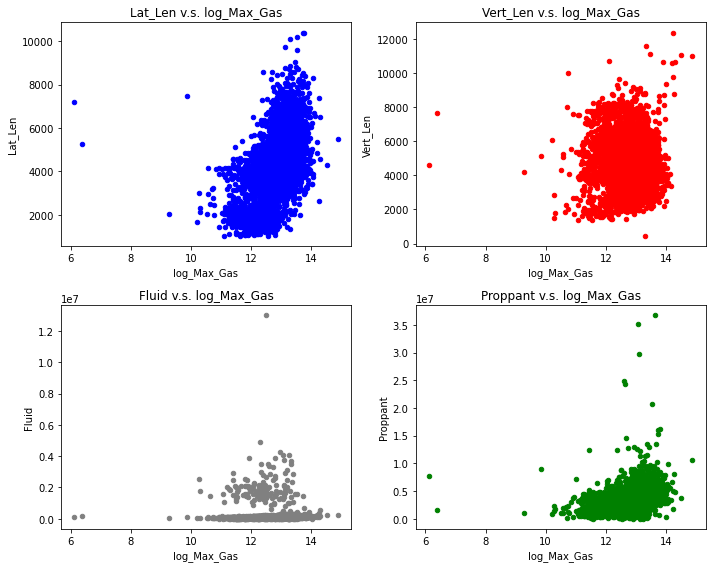

In [83]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, forth plot)

# Subplot 1: Lat_Len v.s. log_Max_Gas
df.plot(kind='scatter', x='log_Max_Gas', y='Lat_Len', figsize=(10, 8), color='blue', ax=ax0) # add to subplot 1
ax0.set_title('Lat_Len v.s. log_Max_Gas')
ax0.set_xlabel('log_Max_Gas')
ax0.set_ylabel('Lat_Len')

# Subplot 2: Vert_Len v.s. log_Max_Gas
df.plot(kind='scatter', x='log_Max_Gas', y='Vert_Len', figsize=(10, 8), color='red', ax=ax1) # add to subplot 2
ax1.set_title ('Vert_Len v.s. log_Max_Gas')
ax1.set_xlabel('log_Max_Gas')
ax1.set_ylabel('Vert_Len')

# Subplot 3: Fluid v.s. log_Max_Gas
df.plot(kind='scatter', x='log_Max_Gas', y='Fluid', figsize=(10, 8), color='grey', ax=ax2) # add to subplot 3
ax2.set_title ('Fluid v.s. log_Max_Gas')
ax2.set_xlabel('log_Max_Gas')
ax2.set_ylabel('Fluid')

# Subplot 4: Proppant v.s. log_Max_Gas
df.plot(kind='scatter', x='log_Max_Gas', y='Proppant', figsize=(10, 8), color='green', ax=ax3) # add to subplot 4
ax3.set_title ('Proppant v.s. log_Max_Gas')
ax3.set_xlabel('log_Max_Gas')
ax3.set_ylabel('Proppant')

fig.tight_layout()
plt.show()

#### Remove outlier using IQR (Inter Quartile Range)

In [84]:
##log_Max_Gas IQR
Q1_lg = np.quantile(df['log_Max_Gas'],0.25)
Q3_lg = np.quantile(df['log_Max_Gas'],0.75)
IQR_lg = Q3_lg - Q1_lg
Low_lg = Q1_lg - 1.5*IQR_lg
High_lg = Q3_lg + 1.5*IQR_lg
##Lat_Len IQR
Q1_ll = np.quantile(df['Lat_Len'],0.25)
Q3_ll = np.quantile(df['Lat_Len'],0.75)
IQR_ll = Q3_ll - Q1_ll
Low_ll = Q1_ll - 1.5*IQR_ll
High_ll = Q3_ll + 1.5*IQR_ll
##Vert_Len IQR
Q1_vl = np.quantile(df['Vert_Len'],0.25)
Q3_vl = np.quantile(df['Vert_Len'],0.75)
IQR_vl = Q3_vl - Q1_vl
Low_vl = Q1_vl - 1.5*IQR_vl
High_vl = Q3_vl + 1.5*IQR_vl
##Fluid IQR
Q1_fl = np.quantile(df['Fluid'],0.25)
Q3_fl = np.quantile(df['Fluid'],0.75)
IQR_fl = Q3_fl - Q1_fl
Low_fl = Q1_fl - 1.5*IQR_fl
High_fl = Q3_fl + 1.5*IQR_fl
##Proppant IQR
Q1_prop = np.quantile(df['Proppant'],0.25)
Q3_prop = np.quantile(df['Proppant'],0.75)
IQR_prop = Q3_prop - Q1_prop
Low_prop = Q1_prop - 1.5*IQR_prop
High_prop = Q3_prop + 1.5*IQR_prop

df_IQR = df.loc[(df['log_Max_Gas'] > Low_lg) & (df['log_Max_Gas'] < High_lg) & 
                  #(df['Lat_Len'] > Low_ll) & (df['Lat_Len'] < High_ll) & ## Exclude outliers from Lat_Len doesn't improve overall correlation
                  #(df['Vert_Len'] > Low_vl) & (df['Vert_Len'] < High_vl) & ## Exclude outliers from Vert_Len doesn't improve overall correlation
                  (df['Fluid'] > Low_fl) & (df['Fluid'] < High_fl) &
                  (df['Proppant'] > Low_prop) & (df['Proppant'] < High_prop)]
df_IQR.describe()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,log_Max_Gas
count,4.789000e+03,4789.000000,4789.000000,4789.000000,4.789000e+03,4789.000000
mean,4.255743e+05,4138.550010,4577.432032,102719.626018,3.444723e+06,12.838722
std,2.047640e+05,1318.417217,1383.343120,44333.336565,1.397554e+06,0.514700
min,8.836700e+04,1017.000000,435.000000,66.000000,1.859000e+05,11.389254
25%,2.713060e+05,3492.000000,3693.000000,77094.000000,2.735250e+06,12.511003
50%,3.984170e+05,4146.000000,4398.000000,105064.000000,3.558019e+06,12.895254
75%,5.491150e+05,4857.000000,5490.000000,133857.000000,4.317540e+06,13.216063
max,1.598879e+06,8881.000000,12380.000000,227929.000000,6.856487e+06,14.284813


In [25]:
df_IQR.corr()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,log_Max_Gas
Max_Gas,1.000000,0.502321,-0.142780,0.468389,0.477215,0.949862
Lat_Len,0.502321,1.000000,-0.243270,0.755825,0.872006,0.555841
Vert_Len,-0.142780,-0.243270,1.000000,-0.147197,-0.221592,-0.166851
Fluid,0.468389,0.755825,-0.147197,1.000000,0.812532,0.515968
Proppant,0.477215,0.872006,-0.221592,0.812532,1.000000,0.535576
log_Max_Gas,0.949862,0.555841,-0.166851,0.515968,0.535576,1.000000


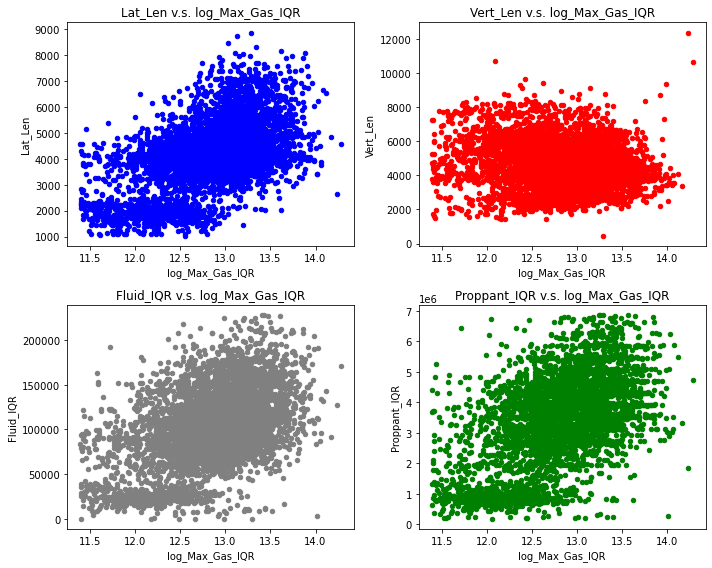

In [85]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, forth plot)

# Subplot 1: Lat_Len v.s. Max_Gas
df_IQR.plot(kind='scatter', x='log_Max_Gas', y='Lat_Len', figsize=(10, 8), color='blue', ax=ax0) # add to subplot 1
ax0.set_title('Lat_Len v.s. log_Max_Gas_IQR')
ax0.set_xlabel('log_Max_Gas_IQR')
ax0.set_ylabel('Lat_Len')

# Subplot 2: Vert_Len v.s. Max_Gas
df_IQR.plot(kind='scatter', x='log_Max_Gas', y='Vert_Len', figsize=(10, 8), color='red', ax=ax1) # add to subplot 2
ax1.set_title ('Vert_Len v.s. log_Max_Gas_IQR')
ax1.set_xlabel('log_Max_Gas_IQR')
ax1.set_ylabel('Vert_Len')

# Subplot 3: Fluid v.s. Max_Gas
df_IQR.plot(kind='scatter', x='log_Max_Gas', y='Fluid', figsize=(10, 8), color='grey', ax=ax2) # add to subplot 3
ax2.set_title ('Fluid_IQR v.s. log_Max_Gas_IQR')
ax2.set_xlabel('log_Max_Gas_IQR')
ax2.set_ylabel('Fluid_IQR')

# Subplot 4: Proppant v.s. Max_Gas
df_IQR.plot(kind='scatter', x='log_Max_Gas', y='Proppant', figsize=(10, 8), color='green', ax=ax3) # add to subplot 4
ax3.set_title ('Proppant_IQR v.s. log_Max_Gas_IQR')
ax3.set_xlabel('log_Max_Gas_IQR')
ax3.set_ylabel('Proppant_IQR')

fig.tight_layout()
plt.show()

#### Remove outlier using Z-score

In [27]:
from scipy import stats
df['z_logMaxgas']=stats.zscore(df['log_Max_Gas'])
df['z_prop']=stats.zscore(df['Proppant'])
df['z_Lat_Len']=stats.zscore(df['Lat_Len'])
df['z_Fluid']=stats.zscore(df['Fluid'])  ### Exclude outliers from Vert_Len and Lat-Len doesn't improve overall correlation
df_z = df.loc[(df['z_logMaxgas'].abs()<=3) & (df['z_prop'].abs()<=3) & (df['z_Fluid'].abs()<=3)]
df_z.describe()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,log_Max_Gas,z_logMaxgas,z_prop,z_Lat_Len,z_Fluid
count,4.997000e+03,4997.000000,4997.000000,4.997000e+03,4.997000e+03,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,4.258706e+05,4166.519912,4594.454072,1.078206e+05,3.497859e+06,12.829125,0.031741,-0.020926,0.013095,-0.128621
std,2.114297e+05,1377.424247,1412.174475,7.327950e+04,1.528340e+06,0.541677,0.933123,0.815454,0.973847,0.197652
min,6.500600e+04,1017.000000,435.000000,6.600000e+01,2.000000e+03,11.082235,-2.977545,-1.886161,-2.213634,-0.419261
25%,2.696570e+05,3481.000000,3700.000000,7.721900e+04,2.728471e+06,12.504906,-0.526775,-0.431437,-0.471572,-0.211161
50%,3.992800e+05,4152.000000,4410.000000,1.062390e+05,3.574104e+06,12.897418,0.149388,0.019755,0.002829,-0.132887
75%,5.511760e+05,4899.000000,5518.000000,1.356240e+05,4.339040e+06,13.219809,0.704756,0.427890,0.530963,-0.053629
max,1.992645e+06,9605.000000,12380.000000,1.260660e+06,9.120277e+06,14.504973,2.918649,2.978945,3.858132,2.980865


In [28]:
df_z.corr()

,Max_Gas,Lat_Len,Vert_Len,Fluid,Proppant,log_Max_Gas,z_logMaxgas,z_prop,z_Lat_Len,z_Fluid
Max_Gas,1.000000,0.513633,-0.092699,0.290448,0.479333,0.940299,0.940299,0.479333,0.513633,0.290448
Lat_Len,0.513633,1.000000,-0.205635,0.430401,0.867743,0.564072,0.564072,0.867743,1.000000,0.430401
Vert_Len,-0.092699,-0.205635,1.000000,-0.085959,-0.191565,-0.122616,-0.122616,-0.191565,-0.205635,-0.085959
Fluid,0.290448,0.430401,-0.085959,1.000000,0.459737,0.306336,0.306336,0.459737,0.430401,1.000000
Proppant,0.479333,0.867743,-0.191565,0.459737,1.000000,0.531386,0.531386,1.000000,0.867743,0.459737
log_Max_Gas,0.940299,0.564072,-0.122616,0.306336,0.531386,1.000000,1.000000,0.531386,0.564072,0.306336
z_logMaxgas,0.940299,0.564072,-0.122616,0.306336,0.531386,1.000000,1.000000,0.531386,0.564072,0.306336
z_prop,0.479333,0.867743,-0.191565,0.459737,1.000000,0.531386,0.531386,1.000000,0.867743,0.459737
z_Lat_Len,0.513633,1.000000,-0.205635,0.430401,0.867743,0.564072,0.564072,0.867743,1.000000,0.430401
z_Fluid,0.290448,0.430401,-0.085959,1.000000,0.459737,0.306336,0.306336,0.459737,0.430401,1.000000


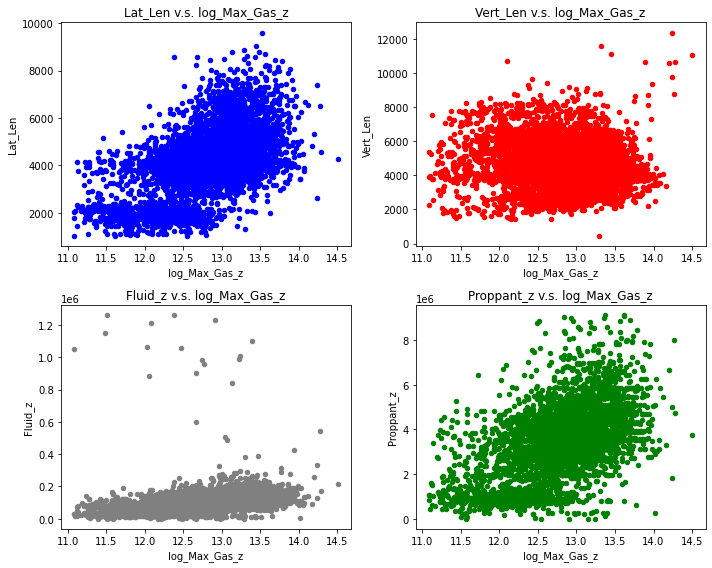

In [29]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, forth plot)

# Subplot 1: Lat_Len v.s. Max_Gas
df_z.plot(kind='scatter', x='log_Max_Gas', y='Lat_Len', figsize=(10, 8), color='blue', ax=ax0) # add to subplot 1
ax0.set_title('Lat_Len v.s. log_Max_Gas_z')
ax0.set_xlabel('log_Max_Gas_z')
ax0.set_ylabel('Lat_Len')

# Subplot 2: Vert_Len v.s. Max_Gas
df_z.plot(kind='scatter', x='log_Max_Gas', y='Vert_Len', figsize=(10, 8), color='red', ax=ax1) # add to subplot 2
ax1.set_title ('Vert_Len v.s. log_Max_Gas_z')
ax1.set_xlabel('log_Max_Gas_z')
ax1.set_ylabel('Vert_Len')

# Subplot 3: Fluid v.s. Max_Gas
df_z.plot(kind='scatter', x='log_Max_Gas', y='Fluid', figsize=(10, 8), color='grey', ax=ax2) # add to subplot 3
ax2.set_title ('Fluid_z v.s. log_Max_Gas_z')
ax2.set_xlabel('log_Max_Gas_z')
ax2.set_ylabel('Fluid_z')

# Subplot 4: Proppant v.s. Max_Gas
df_z.plot(kind='scatter', x='log_Max_Gas', y='Proppant', figsize=(10, 8), color='green', ax=ax3) # add to subplot 4
ax3.set_title ('Proppant_z v.s. log_Max_Gas_z')
ax3.set_xlabel('log_Max_Gas_z')
ax3.set_ylabel('Proppant_z')

fig.tight_layout()
plt.show()

count    5.168000e+03
mean     1.555068e+05
std      3.707851e+05
min      6.600000e+01
25%      7.807425e+04
50%      1.075520e+05
75%      1.380805e+05
max      1.300911e+07
Name: Fluid, dtype: float64
90009.375


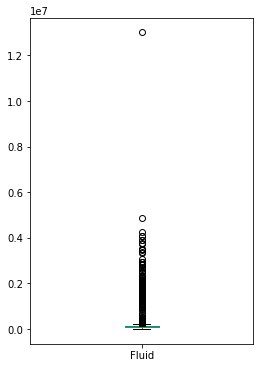

In [30]:
df['Fluid'].plot(kind='box', figsize=(4, 6))
print(df['Fluid'].describe())
print(1.5*IQR_fl)

Relative small IQR and relative large standart deviation in df['Fluid'] causes IQR method to remove more outlier than z-score method

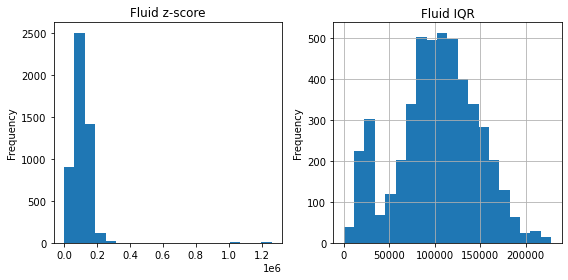

In [31]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 
df_z['Fluid'].plot(kind='hist', bins=20, figsize=(8, 4), ax=ax0)
ax0.set_title ('Fluid z-score')

df_IQR['Fluid'].plot(kind='hist', bins=20, figsize=(8, 4), ax=ax1)
ax1.set_title ('Fluid IQR')

fig.tight_layout()
plt.grid(which='both')
plt.show()

## Model Training and Testing
### Using df_IQR
#### Select Columns

In [86]:
x = df_IQR.drop(['log_Max_Gas', 'Max_Gas'],axis=1) ## Max_Gas is the target values
y = df_IQR['log_Max_Gas']

#### Standardize
Standardize features by removing the mean and scaling to unit variance

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)   
scaled_features = scaler.transform(x)
x_std = pd.DataFrame(scaled_features,columns=x.columns)
x_std.head()

,Lat_Len,Vert_Len,Fluid,Proppant
0,-1.996200,1.715276,-1.958452,-2.112641
1,-1.844487,2.665971,-1.222676,-2.137072
2,-1.892277,1.056658,-0.303565,-1.094471
3,-1.890760,1.076901,-0.311099,-1.141916
4,-1.891518,1.063165,-0.258898,-0.440260


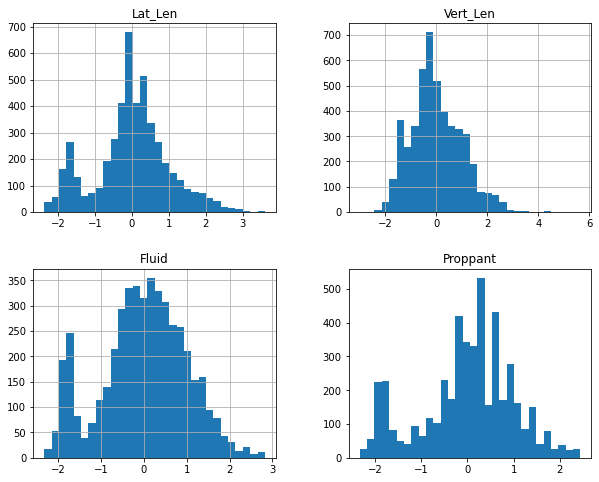

In [34]:
x_std.hist(bins=30, figsize=(10, 8))
plt.grid(which='both')
plt.show()

#### Split training and testing data

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.20, random_state=42)
print(x_train.describe())
print(y_train.describe())
print(x_test.describe())

           Lat_Len     Vert_Len        Fluid     Proppant
count  3831.000000  3831.000000  3831.000000  3831.000000
mean      0.018067     0.005894     0.010104     0.019995
std       0.998094     0.994116     0.995365     0.996244
min      -2.367897    -2.994821    -2.315737    -2.332048
25%      -0.463900    -0.634350    -0.548192    -0.501123
50%       0.017788    -0.129000     0.073595     0.096183
75%       0.574954     0.670958     0.700717     0.626274
max       3.597454     5.640960     2.824566     2.441494
count    3831.000000
mean       12.844333
std         0.511092
min        11.389254
25%        12.517518
50%        12.905306
75%        13.220074
max        14.236179
Name: log_Max_Gas, dtype: float64
          Lat_Len    Vert_Len       Fluid    Proppant
count  958.000000  958.000000  958.000000  958.000000
mean    -0.072250   -0.023568   -0.040404   -0.079961
std      1.005387    1.023892    1.018361    1.011975
min     -2.320107   -2.261014   -2.315083   -2.322551
25%   

#### Training and Testing
##### Linear Regression

Parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Index(['Lat_Len', 'Vert_Len', 'Fluid', 'Proppant'], dtype='object')
Coefficients:  [ 0.1616478  -0.02333675  0.0958919   0.04846548]
Intercept:  12.839612128207397
RMSE: 0.42
R2: 0.36
Correlation: 0.60


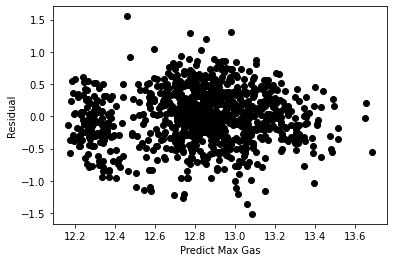

In [127]:
reg = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

# The parameters
print('Parameters: ', reg.get_params())
# The coefficients
print(x_train.columns)
print('Coefficients: ', reg.coef_)
# The intercept
print('Intercept: ', reg.intercept_)
# The mean squared error
print('RMSE: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f'
      % r2_score(y_test, y_pred))
# The Correlation between predict and test
print('Correlation: %.2f' 
      % np.corrcoef(y_test, y_pred)[0,1])

# Plot outputs
plt.scatter(y_pred, (y_test-y_pred),  color='black')
#plt.plot(x_test['Lat_Len'], y_pred, color='blue', linewidth=3)
plt.xlabel('Predict Max Gas')
plt.ylabel('Residual')
#plt.plot([5,20], [5,20], 'red')
plt.show()

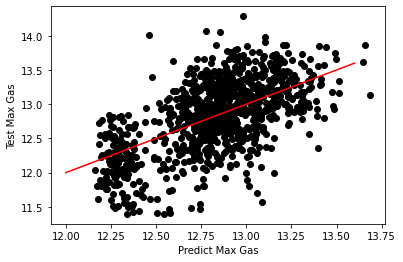

In [126]:
plt.scatter(y_pred, y_test,  color='black')
plt.xlabel('Predict Max Gas')
plt.ylabel('Test Max Gas')
plt.plot([12,13.6], [12,13.6], 'red', label='1:1')
plt.show()

#### Confidence Intervals
Let's calculate the 95% confidence interval for the slope parameter, $b_1$ of our model.

We first need the $t_{critical}$ value, given $alpha = 0.95$ and $df = n-2$.

In [92]:
t_critical = st.t.ppf([0.025,0.975], df=len(y_pred)-2)
print('The t critical lower and upper values are ' + str(t_critical))

The t critical lower and upper values are [-1.98397152  1.98397152]


In [116]:
from scipy import stats
print('t statistic for', x_train.columns[0], 'is', str(round(reg.coef_[0]/stats.sem(y_pred),2)))
#print(np.std(y_pred))
#print((int(len(y_pred)))**(1/2))
print('The slope confidence interval for',x_train.columns[0], 'is', str(round(reg.coef_[0],2)) + '+/-' + str(round(t_critical[1] * stats.sem(y_pred),2)))
print('The slope P02.5 and P97.5 are ' + str(reg.coef_[0] + t_critical*stats.sem(y_pred)))

t statistic for Lat_Len is 16.76
The slope confidence interval for Lat_Len is 0.16+/-0.02
The slope P02.5 and P97.5 are [0.1425105  0.18078509]


### Using df_z
#### Select Columns

In [37]:
x = df_z.drop(['log_Max_Gas', 'Max_Gas', 'z_logMaxgas', 'z_prop', 'z_Lat_Len', 'z_Fluid'],axis=1) ## Max_Gas is the target values
y = df_z['log_Max_Gas']
x.head()

,Lat_Len,Vert_Len,Fluid,Proppant
Index,,,,
1,1507,6950,15904,492500
2,1707,8265,48520,458360
3,1644,6039,89263,1915300
4,1646,6067,88929,1849000
5,1645,6048,91243,2829500


#### Standardize
Standardize features by removing the mean and scaling to unit variance

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)   
scaled_features = scaler.transform(x)
x_std = pd.DataFrame(scaled_features,columns=x.columns)
x_std.head()

,Lat_Len,Vert_Len,Fluid,Proppant
0,-1.930985,1.668194,-1.254454,-1.966617
1,-1.785772,2.599476,-0.809319,-1.988957
2,-1.831514,1.023025,-0.253269,-1.035579
3,-1.830062,1.042855,-0.257827,-1.078964
4,-1.830788,1.029399,-0.226246,-0.437354


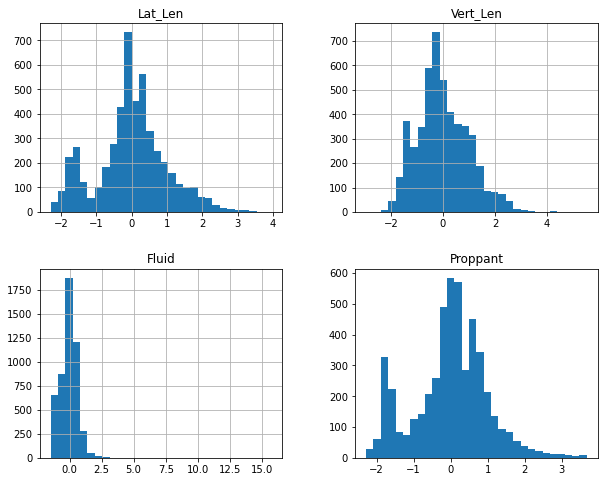

In [39]:
x_std.hist(bins=30, figsize=(10, 8))
plt.grid(which='both')
plt.show()

#### Split training and testing data

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.20, random_state=42)
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 3941 to 860
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lat_Len   3997 non-null   float64
 1   Vert_Len  3997 non-null   float64
 2   Fluid     3997 non-null   float64
 3   Proppant  3997 non-null   float64
dtypes: float64(4)
memory usage: 156.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 84 to 4001
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lat_Len   1000 non-null   float64
 1   Vert_Len  1000 non-null   float64
 2   Fluid     1000 non-null   float64
 3   Proppant  1000 non-null   float64
dtypes: float64(4)
memory usage: 39.1 KB
None


#### Training and Testing
##### Linear Regression

Coefficients: 
 [ 0.21801466 -0.00683644  0.04633576  0.07390148]
Intercept:  12.834731966927597
RMSE: 0.46
R2: 0.31
Correlation: 0.56


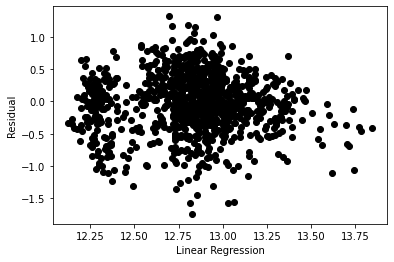

In [41]:
reg = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: ', reg.intercept_)
# The mean squared error
print('RMSE: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('R2: %.2f'
      % r2_score(y_test, y_pred))
# The Correlation between predict and test
print('Correlation: %.2f' 
      % np.corrcoef(y_test, y_pred)[0,1])

# Plot outputs
plt.scatter(y_pred, (y_test-y_pred),  color='black')
#plt.plot(x_test['Lat_Len'], y_pred, color='blue', linewidth=3)

plt.xlabel('Linear Regression')
plt.ylabel('Residual')
plt.show()